In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
df = pd.read_csv('Fish.csv')
df.shape

(159, 7)

## Multiclass Classification - 다중 분류

In [3]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [8]:
df.columns[1:]

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

In [7]:
fish_input = df[df.columns[1:]].to_numpy()
fish_input.shape

(159, 6)

In [11]:
fish_target = df[df.columns[0]].to_numpy()
fish_target.shape

(159,)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [15]:
ss = StandardScaler()

In [17]:
ss.fit(train_input)

StandardScaler()

In [18]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
kn = KNeighborsClassifier(n_neighbors=3)

In [34]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier(n_neighbors=3)

In [35]:
kn.score(train_scaled, train_target), kn.score(test_scaled, test_target)

(0.8907563025210085, 0.825)

In [36]:
kn.classes_ 
# 알파벳 순으로 정렬됨

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [37]:
# 테스트셋 5개만 예측
kn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [38]:
pred_prob = kn.predict_proba(test_scaled[:5])
pred_prob

array([[0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.66666667, 0.        , 0.33333333,
        0.        , 0.        ],
       [0.        , 0.        , 0.66666667, 0.        , 0.33333333,
        0.        , 0.        ]])

In [41]:
np.round(pred_prob, decimals=4)

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

In [39]:
dist, idx = kn.kneighbors(test_scaled[3:4])
dist, idx

(array([[0.21158296, 0.33913857, 0.38214279]]), array([[104, 115, 106]]))

In [42]:
train_target[idx] 
# 해당 샘플의 이웃 : Roach 1개, Perch  2개

array([['Roach', 'Perch', 'Perch']], dtype=object)

# Logistic Regression - 로지스틱 회귀
,,,, 분류모델이다  
이 알고리즘은 선형 회귀와 동일하게 선형방정식을 학습한다.  

ex. $ z = a \times (\text{Weight}) + b \times (\text{Length}) + c \times (\text{Diagonal}) + d \times (\text{Height}) + e \times (\text{Width}) + f ) $

a, b, c, d, e 는 가중치이며, z는 어떤 값도 될 수 있다.  

z가 확률이 되려면 0이나 1사이의 값이 되어야 하는데,,,   
z가 아주 큰 음수일 때 0도 되고, 아주 큰 양수일 때 1로 바꾸는 방법은?

**Sigmoid Function**( aka Logistic Funtion )를 사용한다.

## Sigmoid Function
시그모이드 함수  

선형방정식의 출력 z의 음수를 사용해 자연 상수 e를 거듭제곱하고 1을 더한 값의 역수를 취한다.  
z가 무한히 큰 음수일 경우 이 함수는 0에 가까워지고, z가 무한히 큰 양수가 될 때는 1에 가까워진다(z가 0이 되면 0.5가 된다).  
z가 어떤 값이 되더라도 $\phi$ 는 절대로 0~1사이를 벗어날 수 없다.  

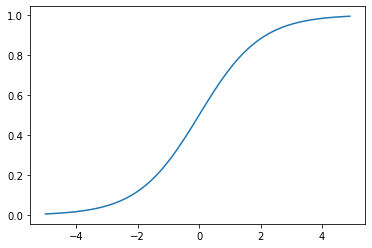

In [44]:
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)

In [45]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
bream_smelt_indexes

array([ True, False,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False,  True, False, False, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False])

In [48]:
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [51]:
lr.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [54]:
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [55]:
lr.predict_proba(train_bream_smelt[:5])
# 0번째 인덱스 : Bream일 확률, 1번째 인덱스 : Smelt일 확률

array([[0.99793528, 0.00206472],
       [0.02390293, 0.97609707],
       [0.99575366, 0.00424634],
       [0.98765044, 0.01234956],
       [0.9980632 , 0.0019368 ]])

In [57]:
lr.coef_, lr.intercept_
# 로지스틱 모델이 학습한 선형 방정식의 계수가 들어있다.

(array([[-0.36707083, -0.50388475, -0.52530414, -0.60537206, -0.92906093,
         -0.66884746]]),
 array([-2.35565567]))

모델이 학습한 방정식은  
  
$$ z = -0.36707083 \times (\text{Weight}) + -0.50388475 \times (\text{Length}) + -0.52530414 \times (\text{Diagonal}) + -0.60537206 \times (\text{Height}) + -0.92906093 \times (\text{Width}) + -2.35565567 ) $$

In [59]:
z = lr.decision_function(train_bream_smelt[:5])
z # 이 값을 시그모이드 함수에 넣으면 확률을 얻을 수 있다. 

array([-6.18069141,  3.70956106, -5.45744326, -4.38170875, -6.24478056])

In [60]:
from scipy.special import expit

In [61]:
expit(z)

array([0.00206472, 0.97609707, 0.00424634, 0.01234956, 0.0019368 ])

In [62]:
lr.predict_proba(train_bream_smelt[:5]) 
# predict_proba() 메소드 출력의 두 번째 열 값과 동일함 
# 즉, decision_function() 메소드는 양성 클래스(1)에 대한 z값을 반환한다.

array([[0.99793528, 0.00206472],
       [0.02390293, 0.97609707],
       [0.99575366, 0.00424634],
       [0.98765044, 0.01234956],
       [0.9980632 , 0.0019368 ]])

## 로지스틱 회귀로 다중 분류 수행
1. Logistic Regression 은 기본적으로 반복적인 알고리즘을 사용한다.   
2. max_iter 매개변수에서 반복 횟수를 지정하며, 기본값은 100이다.  
3. Ridge Regression과 같이 **계수의 제곱을 규제**한다. Ridge alpha == LR C
4. C는 alpha와 반대로 작을수록 규제가 크다. (기본값은 1) : 규제 완화 > 20


In [63]:
lr = LogisticRegression(C = 20, max_iter = 10000)
lr.fit(train_scaled, train_target)

LogisticRegression(C=20, max_iter=10000)

In [64]:
lr.score(train_scaled, train_target), lr.score(test_scaled, test_target)

(0.9411764705882353, 0.925)

In [65]:
lr.predict(train_scaled[:5])

array(['Bream', 'Pike', 'Smelt', 'Perch', 'Parkki'], dtype=object)

In [73]:
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [70]:
test_prob = lr.predict_proba(test_scaled[:5])
np.round(test_prob, decimals = 3)

array([[0.   , 0.014, 0.838, 0.   , 0.138, 0.007, 0.003],
       [0.   , 0.002, 0.042, 0.   , 0.006, 0.95 , 0.   ],
       [0.   , 0.   , 0.029, 0.937, 0.01 , 0.024, 0.   ],
       [0.012, 0.034, 0.27 , 0.004, 0.596, 0.   , 0.084],
       [0.   , 0.   , 0.906, 0.002, 0.088, 0.003, 0.001]])

In [75]:
lr.coef_, lr.intercept_
# 5개의 특성을 사용하므로, coef 열은 5개
# 다중 분류는 클래스마다 z값을 하나씩 계산한다. -> 가장 높은 z 값을 출력하는 클래스가 예측클래스이다.

(array([[-1.29766396, -1.29099702, -0.6141258 ,  2.9529324 ,  7.72823506,
         -0.97789375],
        [ 0.30624253, -1.21779232, -1.67843316, -3.44892274,  6.62085538,
         -1.7160445 ],
        [ 3.46345308,  1.64118318,  5.355273  , -8.99920892, -5.78437263,
          3.74311871],
        [-0.54208057,  2.65690908,  2.60781563,  2.95402932, -3.5504292 ,
         -1.96251266],
        [-1.28211654, -1.31055151, -5.3480303 ,  5.76687922, -0.86908487,
          1.8564072 ],
        [-1.46757506,  1.67464932,  0.94100783,  0.85615547, -5.8288029 ,
         -4.64311265],
        [ 0.81974053, -2.15340072, -1.2635072 , -0.08186474,  1.68359915,
          3.70003764]]),
 array([-0.04405068, -0.30889642,  3.24550332, -0.43916686,  2.73009058,
        -6.62710081,  1.44362087]))

## Softmax Function
다중분류는 softmax 함수를 사용해 7개의 z값을 확률로 변환한다. ( 이중분류는 sigmoid 함수를 사용해 확률값을 계산한다. )  
각각 계산한 z 값을 사용해 지수함수 $e^{z1} \text{~} e^{zn}$ 을 모두 계산해 더한다.  
$$e\text{_}sum = \sum_{n=1}^N e^{zn}$$
이후
$$s_1 = {e^{z1} \over e\text{_}sum}, s_2 = {e^{z2} \over e\text{_}sum}, \cdots s_n = {e^{zn} \over e\text{_}sum} $$
로, 모든 값을 더하면 분자와 분모가 같아지므로 1이 된다. 
  
    
이 두 함수는 신경망에서도 나온다

In [78]:
from scipy.special import softmax

In [77]:
decision_result = lr.decision_function(test_scaled[:5])
np.round(decision_result, decimals=2)

array([[ -6.34,   1.08,   5.18,  -3.14,   3.37,   0.35,  -0.49],
       [-10.78,   1.81,   4.88,  -2.81,   2.97,   8.  ,  -4.09],
       [ -4.78,  -6.84,   3.37,   6.84,   2.3 ,   3.16,  -4.06],
       [ -0.56,   0.5 ,   2.58,  -1.58,   3.37,  -5.72,   1.41],
       [ -6.35,  -2.07,   5.86,  -0.39,   3.52,   0.07,  -0.64]])

In [80]:
prob = softmax(decision_result, axis = 1) # axis = 1 : 각 행의 소프트맥스를 계산한다. axis를 지정해주지 않음녀 배열 전체에 대해 소프트맥스를 계산한다.
np.round(prob, decimals = 3) 

array([[0.   , 0.014, 0.838, 0.   , 0.138, 0.007, 0.003],
       [0.   , 0.002, 0.042, 0.   , 0.006, 0.95 , 0.   ],
       [0.   , 0.   , 0.029, 0.937, 0.01 , 0.024, 0.   ],
       [0.012, 0.034, 0.27 , 0.004, 0.596, 0.   , 0.084],
       [0.   , 0.   , 0.906, 0.002, 0.088, 0.003, 0.001]])

In [81]:
# predict_proba : 각 열이 지칭하는 target일 확률 == 예측확률
np.round(lr.predict_proba(test_scaled[:5]), decimals = 3)

array([[0.   , 0.014, 0.838, 0.   , 0.138, 0.007, 0.003],
       [0.   , 0.002, 0.042, 0.   , 0.006, 0.95 , 0.   ],
       [0.   , 0.   , 0.029, 0.937, 0.01 , 0.024, 0.   ],
       [0.012, 0.034, 0.27 , 0.004, 0.596, 0.   , 0.084],
       [0.   , 0.   , 0.906, 0.002, 0.088, 0.003, 0.001]])

In [82]:
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)